In [141]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
from tabulate import tabulate
import matplotlib
import piecewise_regression
import json

In [325]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

def decimal(x):
    return x.replace(',', '.').encode()

def sum_err(x,sx):
    return np.sum(x),np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def diff_err(x,sx):
    return x[0]-x[1],np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def times_err(x,sx):
    return np.prod(x), np.prod(x)*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))

#def frac_err(x,sx):
#    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum((sx/x)**2))

def frac_err(x,sx):
    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))
    #return [np.sum((i/j)**2) for i,j in zip(sx,x)]

In [97]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# **UKOL 1**

## DATA

In [5]:
### POCET KMITU ZA 5 MINUT
n_raw = np.array([874, 866, 855, 873, 845, 871, 809, 856, 873, 873, 871,877, 872, 873])

In [46]:
m = 4.59/1000 ##g
r = 11.9/2000 ##mm
V = 1.133/1000 ##m**2

In [47]:
p_mistnost = 994.1 #hPa
b = 994.1*100
b

99410.0

In [48]:
n = mean(n_raw)
sn = error(n_raw)
print('{} +- {}'.format(n,sn))

863.4285714285714 +- 4.675941775394607


In [57]:
T = (5*60)/n
sT = 5*60*sn/n**2
print('{} +- {}'.format(T,sT))


0.34745201853077434 +- 0.0018816442519445074


In [58]:
p = b + m*9.81/(np.pi*r**2)
sp = 10
print('{} +- {}'.format(p,sp))

99814.8534912533 +- 10


In [59]:
k = 4*m*V/(T**2*p*r**4)
sk = 4*m*V/(p*r**4)*sT/T**4
print('{} +- {}'.format(k,sk))

1.37736762928113 +- 0.021468302792772898


In [100]:
T = np.array([n_raw])

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrrrrrrrrrr}
\toprule
 874 & 866 & 855 & 873 & 845 & 871 & 809 & 856 & 873 & 873 & 871 & 877 & 872 & 873 \\
\bottomrule
\end{tabular}


# **UKOL 2**

## Data

In [61]:
h0 = np.array([45.6,29.1,31.5,34.3,36,37.4,37,35.6,36.2,38.4,37.2,36.3])
sh0 = 0.1
h = np.array([12.4,7.2,8.4,8.1,9.7,10,4.7,8.8,8.5,9.2,8.6,8.4])
sh = 0.1 #cm
t = np.array([0.141,0.217,0.081,0.362,0.198,0.146,0.679,0.285,0.359,0.363,0.4,0.445])

In [5]:
h0 = np.array([45.6,29.1,31.5,34.3,36,37.4,35.6,36.2,38.4,37.2,36.3])
sh0 = 0.1
h = np.array([12.4,7.2,8.4,8.1,9.7,10,8.8,8.5,9.2,8.6,8.4])
sh = 0.1 #cm
t = np.array([0.141,0.217,0.081,0.362,0.198,0.146,0.285,0.359,0.363,0.4,0.445])

In [6]:
26.8 - 18.4

8.400000000000002

## Graf a k

In [7]:
k2 = (h0)/(h0-h)
sk2 = frac_err([h0,h0-h],[0.1,0.2])[1]
print(k2)
print(sk2)

[1.37349398 1.32876712 1.36363636 1.30916031 1.36882129 1.3649635
 1.32835821 1.30685921 1.31506849 1.3006993  1.30107527]
[0.03650078 0.03531216 0.03623881 0.0347911  0.0363766  0.03627408
 0.03530129 0.03472995 0.03494811 0.03456625 0.03457624]


a: -0.22 +- 0.09
b: 1.39 +- 0.03


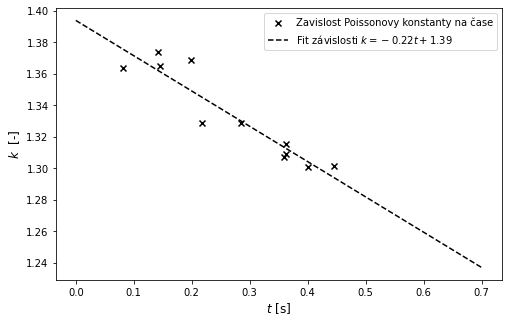

In [8]:
def func(x,a,b):
    return a*x + b

x_range = np.linspace(0,0.7,200)

params, err = curve_fit(func, t, k2, sigma = sk2, absolute_sigma=True)
a,b = params
sa, sb = np.sqrt(np.diag(err))

print('a: {:.2f} +- {:.2f}'.format(a,sa))
print('b: {:.2f} +- {:.2f}'.format(b,sb))

plt.figure(figsize = (8,5))

plt.scatter(t,k2,marker = 'x',color = 'k', label = 'Zavislost Poissonovy konstanty na čase')
plt.plot(x_range, a*x_range + b, linestyle = 'dashed', color = 'k', label = "Fit závislosti" + r" $k = -0.22 t + 1.39$")

#plt.legend(loc='upper right', fontsize=9)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

plt.ylabel(r"$k$  [-]", fontsize=12)
plt.xlabel(r"$t$ [s]", fontsize=12)

plt.savefig('ukol2.pdf', bbox_inches = 'tight')

plt.show()

## Tabulka

In [9]:
T = np.array([h0.round(1),h.round(1), t.round(3), k2.round(2), sk2.round(2)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrr}
\toprule
 45.6 & 12.4 & 0.141 & 1.37 & 0.04 \\
 29.1 &  7.2 & 0.217 & 1.33 & 0.04 \\
 31.5 &  8.4 & 0.081 & 1.36 & 0.04 \\
 34.3 &  8.1 & 0.362 & 1.31 & 0.03 \\
 36   &  9.7 & 0.198 & 1.37 & 0.04 \\
 37.4 & 10   & 0.146 & 1.36 & 0.04 \\
 35.6 &  8.8 & 0.285 & 1.33 & 0.04 \\
 36.2 &  8.5 & 0.359 & 1.31 & 0.03 \\
 38.4 &  9.2 & 0.363 & 1.32 & 0.03 \\
 37.2 &  8.6 & 0.4   & 1.3  & 0.03 \\
 36.3 &  8.4 & 0.445 & 1.3  & 0.03 \\
\bottomrule
\end{tabular}


# UKOL 3

## Data

In [364]:
m = 212.06 #m prazdne je 96.54g
m_nad = 96.54
m2 = 212.6 ##DESTILKA
sm = 0.02
temp = 21.8 #stupnu celsia
p_mistnost = 994.1 #hPa

In [365]:
m2 - m_nad

116.05999999999999

In [366]:
V = (m2 - m_nad)*0.9998*(1+0.00018*(temp))
V

116.49211635611199

In [367]:
0.9998*(1+0.00018*(temp))

1.0037232152

In [370]:
0.9998*(0.00018*(0.1))

1.79964e-05

In [371]:
1.79964e-05/1.0037232152

1.7929644076643253e-05

In [373]:
0.03/116

0.0002586206896551724

In [369]:
sV = np.sqrt(2*0.02**2)*0.9998*(1+0.00018*(temp + 273.15))
sV

0.029779954309962452

# Ukol 4

## Test

In [4]:
V2d = 17.25 ### Dílku, celkem je 25 dílků
V1d = 15.5 ### Dílku
sV2d = 0.25
sV1d = 0.25
dh = 0.85/100##cm
sdh = 0.05/100 ##cm
p_a = p_mistnost*100

In [5]:
0.1 + 0.75

0.85

In [6]:
V1 =100*V1d/25*0.66/1000
sV1 =100*sV1d/25*0.66/1000
V2 =100*V2d/25*0.66/1000
sV2 =100*sV2d/25*0.66/1000
V100 = 65.6/1000

In [7]:
dp = dh*0.9998*(1+0.00018*(temp + 273.15))*9.81*1000
sdp = sdh*0.9998*(1+0.00018*(temp + 273.15))*9.81*1000
dp

87.794430636393

In [8]:
Vol = (V2 - V1)*p_a/dp + V2 - V100
Vol

5.211185270011677

In [9]:
V1,V2, (V2 - V1)*p_a/dp

(0.040920000000000005, 0.04554, 5.231245270011677)

In [10]:
(V1 - V2)*4*0.66*p_mistnost/

SyntaxError: invalid syntax (Temp/ipykernel_21296/4225905397.py, line 1)

In [12]:
V2d = 17.25 ### Dílku, celkem je 25 dílků
V1d = 15.5 ### Dílku
sV2d = 0.25
sV1d = 0.25
dh = 0.85/100##cm
sdh = 0.05/100 ##cm
p_a = p_mistnost*100

In [111]:
np.array([5.529,5.436,5.441,5.228,5.412,5.520,5.280,5.211,5.199,5.077])/0.66

array([8.37727273, 8.23636364, 8.24393939, 7.92121212, 8.2       ,
       8.36363636, 8.        , 7.89545455, 7.87727273, 7.69242424])

In [112]:
np.array([6.758,7.252,6.919,6.565,6.938,6.6629,6.816,6.533,6.750,6.601])/0.66

array([10.23939394, 10.98787879, 10.48333333,  9.9469697 , 10.51212121,
       10.09530303, 10.32727273,  9.89848485, 10.22727273, 10.00151515])

In [150]:
np.array([8.955, 8.650, 8.557, 8.528, 8.460])/0.66

array([13.56818182, 13.10606061, 12.96515152, 12.92121212, 12.81818182])

In [151]:
np.array([9.335, 9.384, 9.223, 9.737, 9.020])/0.66

array([14.14393939, 14.21818182, 13.97424242, 14.7530303 , 13.66666667])

In [26]:
0.25+0.125

0.375

### TRUBKA test

In [41]:
Vt1d = np.array([3.375, 3.25, 3.25, 3.25, 3.25])
Vt2d = np.array([3.5, 3.5, 3.5, 3.625, 3.375])
sVt2d = 0.125
sVt1d = 0.125

dht = np.array([6.4,6.9,5.2,12.3,3.4])/100
sdht = 0.1

p_a = 99410
temp = 21.8

In [47]:
Vt1 =100*Vt1d/25*0.66/100**3
sVt1 =100*sVt1d/25*0.66/100**3

Vt2 =100*Vt2d/25*0.66/100**3
sVt2 =100*sVt2d/25*0.66/100**3

V100 = 65.6/100**3

Vt1,Vt2

(array([8.91e-06, 8.58e-06, 8.58e-06, 8.58e-06, 8.58e-06]),
 array([9.24e-06, 9.24e-06, 9.24e-06, 9.57e-06, 8.91e-06]))

In [48]:
dpt = dht*0.9998*1000*(1+0.00018*(temp + 273.15))*9.81
sdpt = sdht*0.9998*(1+0.00018*(temp + 273.15))*9.81
dpt

array([ 661.04041891,  712.68420164,  537.09534036, 1270.43705509,
        351.17772255])

In [49]:
Vt = (Vt2 - Vt1)*p_a/dpt + Vt2 - V100
Vt*100**3

array([-6.73323126, 35.70125216, 65.79819999, 21.4361756 , 36.72509411])

In [51]:
mean(Vt*100**3)

30.58549812068059

### NADOBA test

In [300]:
Vn1d = np.array([15.8,12.8,15,15.2,12.5])
Vn2d = np.array([16,13.2,15.5,15.5,13.2])


sVn2d = 0.125
sVn1d = 0.125

dhn = np.array([8.373,19.146,11.141,9.699,24.534])/1000

sdhn = 0.1

p_a = 99410
temp = 21.8

In [301]:
Vn1 =100*Vn1d/25*0.66/100**3
sVn1 =100*sVn1d/25*0.66/100**3

Vn2 =100*Vn2d/25*0.66/100**3
sVn2 =100*sVn2d/25*0.66/100**3

V100 = 65.6/100**3

Vn1,Vn2

(array([4.1712e-05, 3.3792e-05, 3.9600e-05, 4.0128e-05, 3.3000e-05]),
 array([4.2240e-05, 3.4848e-05, 4.0920e-05, 4.0920e-05, 3.4848e-05]))

In [302]:
Vn1 =Vn1d*0.66/100**3
sVn1 =sVn1d*0.66/100**3

Vn2 =Vn2d*0.66/100**3
sVn2 =sVn2d*0.66/100**3

In [303]:
dpn = dhn*0.9998*1000*(1+0.00018*(temp + 273.15))*9.81
sdpn = sdhn*0.9998*(1+0.00018*(temp + 273.15))*9.81/100
dpn

array([ 86.48267856, 197.75437282, 115.07267667, 100.17860973,
       253.40571309])

In [304]:
Vn = (Vn2 - Vn1)*p_a/dpn + Vn2 - V100
Vn*100**3

array([ 96.6911931 ,  75.82330052, 229.71331385, 141.11086605,
       124.35266518])

In [305]:
mean(Vn*100**3)

133.53826774054468

In [286]:
Vn*100**3

array([-39.86688069, -43.61686995, -26.86166861, -35.7219134 ,
       -38.76393348])

In [ ]:
Vt*100**3

array([124.40229998, 200.19204691, 148.46781737, 176.97465154,
       205.84109997])

## TRUBKA

In [344]:
Vt1d = np.array([8.375, 8.250, 8.250, 7.875, 8.25, 8.375, 8, 7.875, 7.875, 7.625])
Vt2d = np.array([10.25, 11, 10.5, 10 , 10.5, 10, 10.375, 9.875, 10.25, 10])
dht = np.array([6.9,9.1,6.6,4.9,6.9,6,6.4,4.9,5.7,4.9])/100

Vt1d = np.array([8.375, 8.250, 8.25, 8, 7.875])
Vt2d = np.array([10.25, 10.5 , 10.5, 10.375, 10.25])
dht = np.array([6.9,6.6,6.9,6.4,5.7])/100

In [345]:
Vt1d = np.array([8.375, 7.875, 8.25, 8, 7.875])
Vt2d = np.array([10.25, 9.875, 10.5, 10.375, 10.25])
sVt2d = 0.125
sVt1d = 0.125

dht = np.array([6.5,4.9,6.9,6.4,5.7])/100
sdht = 0.1/100

p_a = 99410
temp = 21.8

In [346]:
rho = 1.0037232152*1000

In [347]:
Vt1 = Vt1d*0.66/100**3
sVt1 = sVt1d*0.66/100**3

Vt2 = Vt2d*0.66/100**3
sVt2 = sVt2d*0.66/100**3

V100 = 65.6/100**3

Vt1*100**3,Vt2*100**3

(array([5.5275, 5.1975, 5.445 , 5.28  , 5.1975]),
 array([6.765 , 6.5175, 6.93  , 6.8475, 6.765 ]))

In [348]:
dpt = dht*0.9998*rho*9.81
sdpt = sdht*0.9998*rho*9.81
dpt

array([639.89610335, 482.38321637, 679.2743251 , 630.05154791,
       561.13965986])

In [349]:
Vt = (Vt2 - Vt1)*p_a/dpt + Vt2 - V100
Vt*100**3

array([133.41476423, 212.94437728, 158.65582043, 188.56881127,
       218.85910389])

In [219]:
array([113.77984781, 133.62288569, 157.8831727 , 216.47920609,
       148.46781737, 113.03946498, 176.97465154, 200.19204691,
       205.84109997, 248.88852446])

NameError: name 'array' is not defined

In [350]:
mean(Vt*100**3)

182.4885754192314

In [262]:
error(Vt*100**3)

13.828470725371735

## NADOBA

In [ ]:
Vn1d = np.array([13.5, 13.125, 13, 12.875, 12.875])
Vn2d = np.array([14.125, 14.250, 14, 14.750, 13.625])

In [351]:
Vn1d = np.array([13.125, 13,13.5, 12.875, 12.875])
Vn2d = np.array([14.250, 14,14.125, 14.750, 13.625])

sVn2d = 0.125
sVn1d = 0.125

dhn = np.array([6.9,5.2,6.4,12.3,3.4])/100
sdhn = 0.1

p_a = 99410
temp = 21.8
rho = 1.0037232152*1000

In [352]:
Vn1 = Vn1d*0.66/100**3
sVn1 = Vn1d*0.66/100**3

Vn2 = Vn2d*0.66/100**3
sVn2 = sVn2d*0.66/100**3

V100 = 65.6/100**3

Vn1,Vn2

(array([8.6625e-06, 8.5800e-06, 8.9100e-06, 8.4975e-06, 8.4975e-06]),
 array([9.4050e-06, 9.2400e-06, 9.3225e-06, 9.7350e-06, 8.9925e-06]))

In [353]:
dpn = dhn*rho*9.81
sdpn = sdhn*rho*9.81
dpn

array([ 679.41020714,  512.01928654,  630.17758343, 1211.12254316,
        334.7818412 ])

In [354]:
Vn = (Vn2 - Vn1)*p_a/dpn + Vn2 - V100
Vn*100**3

array([52.44617763, 71.78087618,  8.79403869, 45.71008478, 90.37762268])

In [355]:
mean(Vn)*100**3

53.821759993312696

In [356]:
error(Vn)*100**3

12.254057513895576

In [260]:
171.17558315316592 - 48.66

122.51558315316592

In [264]:
print('V = 122 +- 8 cm3')

V = 122 +- 8 cm3


## Tabulky

In [322]:
T = np.array([(Vt1*100**3).round(1),(Vt2*100**3).round(1), dht*100]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
 5.5 & 6.8 & 6.5 \\
 5.2 & 6.5 & 4.9 \\
 5.4 & 6.9 & 6.9 \\
 5.3 & 6.8 & 6.4 \\
 5.2 & 6.8 & 5.7 \\
\bottomrule
\end{tabular}


In [323]:
T = np.array([(Vn1*100**3).round(1),(Vn2*100**3).round(1), dhn*100]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
 8.7 & 9.4 &  6.9 \\
 8.6 & 9.2 &  5.2 \\
 8.9 & 9.3 &  6.4 \\
 8.5 & 9.7 & 12.3 \\
 8.5 & 9   &  3.4 \\
\bottomrule
\end{tabular}


In [336]:
T = np.array([(Vn*100**3).round(0),(Vn*0.06*100**3).round(0),(Vt*100**3).round(0),(Vt*0.06*100**3).round(0)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrr}
\toprule
 47 & 3 & 124 &  7 \\
 66 & 4 & 200 & 12 \\
  6 & 0 & 148 &  9 \\
 41 & 2 & 177 & 11 \\
 83 & 5 & 206 & 12 \\
\bottomrule
\end{tabular}


In [330]:
frac_err([(Vn2-Vn1)*p_a,dpn],[0.1*p_a/100**3,1/100])[0]*100**3
frac_err([(Vn2-Vn1)*p_a,dpn],[0.1*p_a/100**3,1/100])[1]*100**3

array([39.72894775, 46.85978452, 23.79598433, 37.14495115, 53.75092931])

In [331]:
frac_err([(Vn2-Vn1)*p_a,dpn],[0.1*p_a/100**3,1/100])[0]*100**3

array([103.5481949 , 122.13376835,  62.02105424,  96.81335296,
       140.09461663])

In [378]:
weighted_error(Vn*100**3,Vn*0.06*100**3)

(12.750967703569358, 0.505481105988294)

In [376]:
weighted_error(Vt*100**3,Vt*0.06*100**3)

(169.89948856513226, 4.643473343331874)

In [375]:
Vn*100**3

array([52.44617763, 71.78087618,  8.79403869, 45.71008478, 90.37762268])